In [21]:
# I added a method to the original model

import model

network = model.network()
network.set_fitness_distr('exponential')
size = 10000
net, degrees = network.generate_network_2(size)

KeyboardInterrupt: 

degree dynamics over nodes

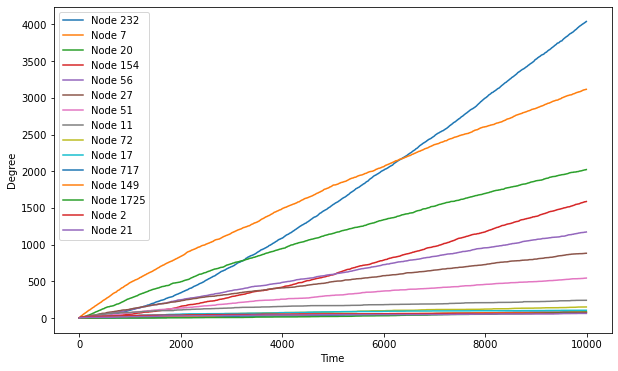

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

time_points = len(degrees)
size = max(len(timestep) for timestep in degrees)
node_degrees = [[] for _ in range(size)]

for t in range(time_points):
    for node in range(size):
        if node < len(data[t]):
            degree = data[t][node]
        else:
            degree = 0
        node_degrees[node].append(degree)

plt.figure(figsize=(10, 6))

# Find the nodes with the highest degrees at the end time
end_time_degrees = [node_degrees[node][-1] for node in range(size)]
top_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:15]

for node in top_nodes:
    plt.plot(range(time_points), node_degrees[node], label=f'Node {node}')

legend_labels = [f'Node {node}' for node in top_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')
plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_4844\1075279544.py:6: RuntimeWarning: divide by zero encountered in log
  lnk0 = np.log(k0)


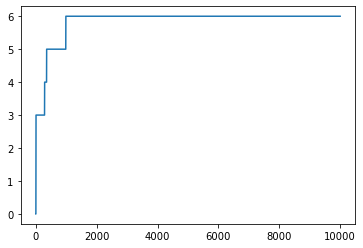

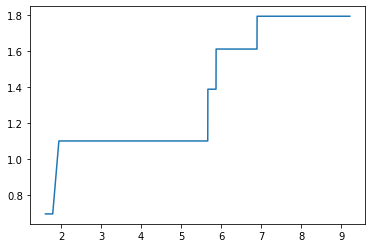

In [24]:
import numpy as np

k0 = node_degrees[6]
t = np.arange(1, len(k0) + 1)

lnk0 = np.log(k0)
lnt = np.log(t)

plt.plot(t, k0)
plt.figure()
plt.plot(lnt, lnk0)

estimating distribution of beta (not correct)

C:\Users\Leo\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Leo\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Leo\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


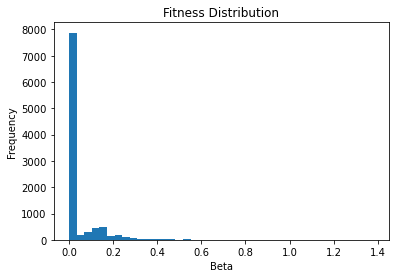

In [20]:
# most likely not correct result, but 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# filter out zero values to avoid problems with ln
filtered_degrees = [[x for x in sublist if x != 0] for sublist in node_degrees]

#print(node_degrees)
#print(filtered_degrees)

lnk = []
for x in filtered_degrees:
    lnk.append(np.log(x))
    

beta = []
# estimating betas using linear regression
for lnki in lnk:
    lnt = np.log(np.arange(1, len(lnki) + 1))
    slope, intercept, _, _, _ = linregress(lnt, lnki)
    beta.append(slope)


plt.hist(beta, bins=40)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.show()

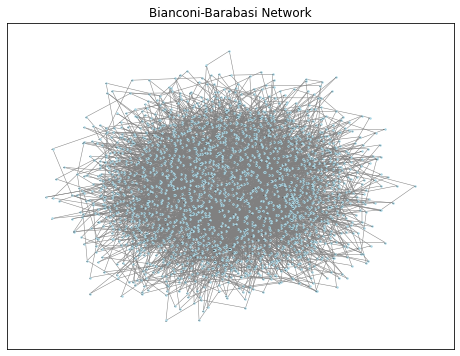

Text(0.5, 1.0, 'Fitness Distribution')

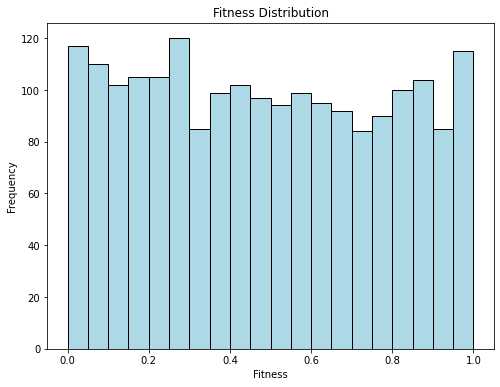

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

data = network.graph

# 1. Draw the network

G = nx.Graph()

degrees = [[] for _ in range(size)]

i = 0
for node, (connections, _) in data.items():
    G.add_edges_from((node, neighbor) for neighbor in connections)
    #degrees[i] = (list(G.degree()))
    #i += 1

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=2, font_size=1, node_color='lightblue', edge_color='gray', width=0.5)
plt.title("Bianconi-Barabasi Network")
plt.show()

# 2. Extract fitness values
fitness_values = [fitness for _, (_, fitness) in data.items()]

# 3. Create a new dict without fitness values
new_data = {node: connections for node, (connections, _) in data.items()}

# 4. Plot the fitness distribution
plt.figure(figsize=(8,6))
plt.hist(fitness_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.title("Fitness Distribution")


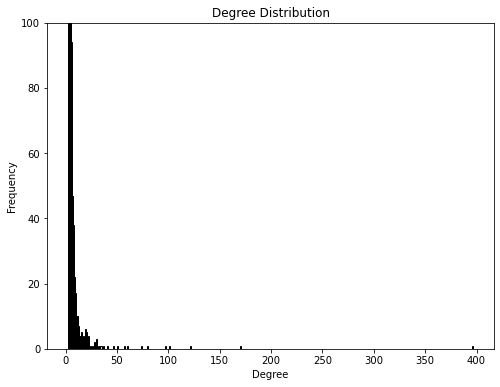

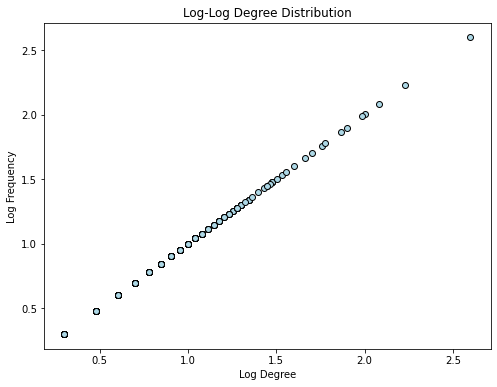

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

degrees = [degree for _, degree in G.degree()]
degree_counts = dict(nx.degree(G))

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), color='lightblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.ylim(0, 100)

# Convert degree and frequency data to numpy arrays for plotting
degrees = np.array(degrees)
frequency = np.array(list(degree_counts.values()))

# Calculate logarithms of degree and frequency
log_degrees = np.log10(degrees)
log_frequency = np.log10(frequency)

# Plot log-log scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(log_degrees, log_frequency, color='lightblue', edgecolor='black')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log Degree Distribution")

plt.show()
